<a href="https://colab.research.google.com/github/degalvis/Shannon_AHP_multiobjetivo/blob/main/Promethee.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

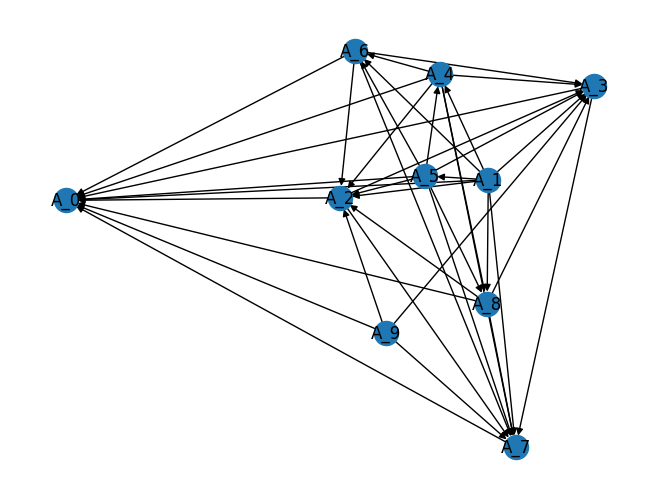

In [1]:
# Método Promethee

import numpy as np
import pandas as pd
import math
import networkx as nx
import matplotlib.pyplot as plt

# Paso 1: Data matrix
# Leer el archivo CSV dentro de un dataframe de pandas
df = pd.read_csv('datos_proyectos.csv', delimiter = ';', encoding='latin1')

# Convertir el dataframe a un array de numpy------------------------------------------------
df = df.drop(df.columns[0], axis=1)
desicionMatrix = df.values
n, m = desicionMatrix.shape


# Vector de pesos obtenidos en el método AHP
pesos = [0.6464052288, 0.101416122, 0.2521786492]

# Paso 1: Construir las matrices de diferencias
criterio1 = np.ndarray((n,m))
criterio2 = np.ndarray((n,m))
criterio3 = np.ndarray((n,m))
criterios = [criterio1, criterio2, criterio3]

j = 0;
while j < len(desicionMatrix):
  i = 0;
  while i < len(desicionMatrix):
    for v in range(len(criterios)):
      criterios [v][j][i] = desicionMatrix[j][v] - desicionMatrix[i][v]
    i += 1
  j += 1

# Paso 2: Función de preferencia con Tipo I usual
criterio1_general = np.ndarray((n,m))
criterio2_general = np.ndarray((n,m))
criterio3_general = np.ndarray((n,m))

# En los objetivos min = 0, max = 1
objetivos = [0, 1, 0]
criterios_generales = [criterio1_general, criterio2_general, criterio3_general]

for i in range(len(criterios)):
  if objetivos[i] == 0:
    j = 0;
    while j < len(desicionMatrix):
      n = 0;
      while n < len(desicionMatrix):
        if criterios[i][j][n] >= 0:
          criterios_generales[i][j][n] = 0
        else:
          criterios_generales[i][j][n] = 1
        n += 1
      j += 1
  else:
    j = 0;
    while j < len(desicionMatrix):
      n = 0;
      while n < len(desicionMatrix):
        if criterios[i][j][n] <= 0:
          criterios_generales[i][j][n] = 0
        else:
          criterios_generales[i][j][n] = 1
        n += 1
      j += 1

# Índices de preferencia agregados
indices_preferencia = np.ndarray((n,m))

j = 0;
while j < len(desicionMatrix):
  i = 0;
  while i < len(desicionMatrix):
    suma = 0;
    for k in range(len(criterios_generales)):
      suma = (criterios_generales[k][j][i] * pesos[k]) + suma
    indices_preferencia[j][i] = suma
    i += 1
  j += 1

# Paso 3: Flujo de superación o sobrecalificación

suma_columnas = []
for p in range(m):
  suma_columnas.append(sum(indices_preferencia[:,p]))

suma_filas = []
for q in range(m):
  suma_filas.append(sum(indices_preferencia[q,:]))

flujo_positivo = []
for r in suma_filas:
  flujo_positivo.append(r/2)

flujo_negativo = []
for w in suma_columnas:
  flujo_negativo.append(w/2)

# Paso 4: Condición de preferencia, indiferencia e incomparabilidad
pre_orden1 = []

for a in range(len(flujo_positivo)):
  for b in range(len(flujo_positivo)-1):
    if a == b:
      continue
    elif flujo_positivo[a] > flujo_positivo[b]:
      pre_orden1.append(("A_"+str(a), "P", "A_"+str(b)))
    elif flujo_positivo[a] < flujo_positivo[b]:
      pre_orden1.append(("A_"+str(a), "R", "A_"+str(b)))
    elif flujo_positivo[a] == flujo_positivo[b]:
      pre_orden1.append(("A_"+str(a), "I", "A_"+str(b)))


for a in range(len(flujo_negativo)):
  for b in range(len(flujo_negativo)-1):
    if a == b:
      continue
    elif flujo_negativo[a] < flujo_negativo[b]:
      pre_orden1.append(("A_"+str(a), "P", "A_"+str(b)))
    elif flujo_negativo[a] > flujo_negativo[b]:
      pre_orden1.append(("A_"+str(a), "R", "A_"+str(b)))
    elif flujo_negativo[a] == flujo_negativo[b]:
      pre_orden1.append(("A_"+str(a), "I", "A_"+str(b)))

G = nx.DiGraph()

for c in range(len(pre_orden1)):
  if "P" in pre_orden1[c][1]:
    G.add_edge(pre_orden1[c][0], pre_orden1[c][2])

nx.draw(G, with_labels=True, arrows=True)
plt.show()